In [1]:
from IPython.display import display,HTML
import warnings
warnings.filterwarnings(action='ignore')

#데이터 전처리
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler
#기계학습 모델 및 평가
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.metrics import accuracy_score,recall_score,precision_score,mean_squared_error,confusion_matrix
from tqdm import tqdm
from sklearn.model_selection import KFold
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#시각화
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap
from datetime import datetime
from io import StringIO
matplotlib.rcParams['axes.unicode_minus'] = False
#한글 폰트 설정
plt.rc('font',family ='Malgun Gothic')
import matplotlib.dates as mdates


from changefinder import ChangeFinder


0       2014-01-15
1       2014-01-16
2       2014-01-17
3       2014-01-18
4       2014-01-19
           ...    
3212    2023-05-14
3213    2023-05-15
3214    2023-05-16
3215    2023-05-17
3216    2023-05-18
Name: 일시, Length: 3217, dtype: object
               지점  평균 풍속(m/s)  평균기압(hPa)  평균 상대습도(%)  평균 기온(°C)  평균 수온(°C)  \
일시                                                                           
2014-01-16  22184         4.2     1029.6        60.0        4.4       14.6   
2014-01-17  22184         3.7     1026.9        59.0        6.1       14.8   
2014-01-18  22184         8.8     1028.5        66.0        5.8       14.9   
2014-01-19  22184         3.8     1029.1        66.0        4.6       14.8   
2014-01-20  22184         9.0     1022.0        64.0        7.6       14.6   
...           ...         ...        ...         ...        ...        ...   
2023-05-14  22184         2.3     1010.5        85.0       15.4       16.6   
2023-05-15  22184         3.9     1009.5        85.

c:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


PeriodIndex(['2023-05-31', '2023-06-01', '2023-06-02', '2023-06-03',
             '2023-06-04', '2023-06-05', '2023-06-06', '2023-06-07',
             '2023-06-08', '2023-06-09',
             ...
             '2031-03-20', '2031-03-21', '2031-03-22', '2031-03-23',
             '2031-03-24', '2031-03-25', '2031-03-26', '2031-03-27',
             '2031-03-28', '2031-03-29'],
            dtype='period[D]', length=2860)
2860    16.666575
2861    16.502341
2862    16.545676
2863    16.531952
2864    16.457435
          ...    
5715    17.740546
5716    17.937531
5717    17.950181
5718    18.008369
5719    17.577744
Name: predicted_mean, Length: 2860, dtype: float64
forecast.predicted_mean 2860    16.666575
2861    16.502341
2862    16.545676
2863    16.531952
2864    16.457435
          ...    
5715    17.740546
5716    17.937531
5717    17.950181
5718    18.008369
5719    17.577744
Name: predicted_mean, Length: 2860, dtype: float64


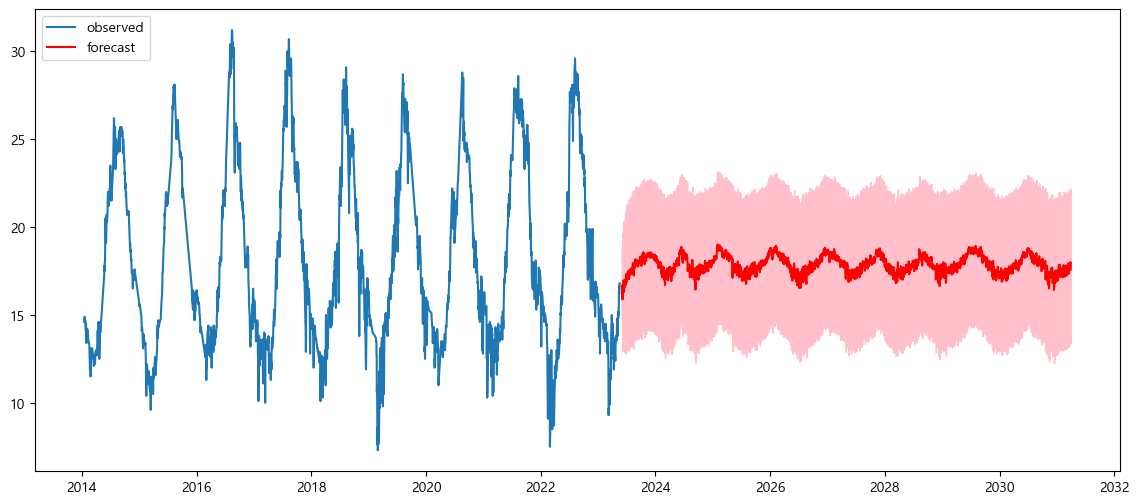

                                      SARIMAX Results                                       
Dep. Variable:                            평균 수온(°C)   No. Observations:                 2860
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 18)   Log Likelihood               -3157.119
Date:                              Wed, 31 May 2023   AIC                           6336.237
Time:                                      15:19:10   BIC                           6401.782
Sample:                                           0   HQIC                          6359.871
                                             - 2860                                         
Covariance Type:                                opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
평균 풍속(m/s)     -0.0420      0.010     -4.269      0.000      -0.061      -0.023
평균기압(hPa)       

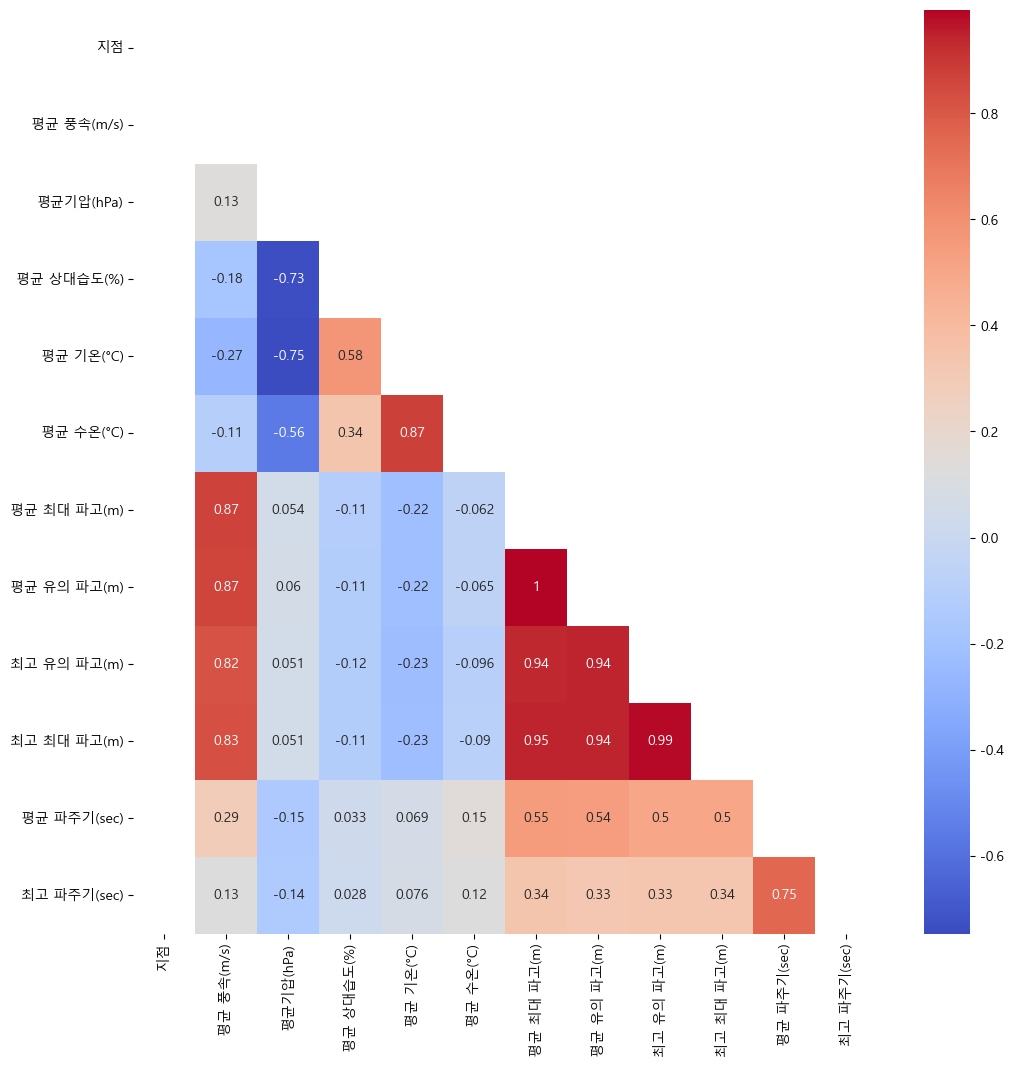

In [2]:
# csv 파일을 읽어옵니다.
from sklearn.preprocessing import StandardScaler,robust_scale
import pandas as pd
# 데이터를 불러옵니다.
data = pd.read_csv('data/20230519추자도해양데이터.csv', parse_dates=True, encoding='utf-8')
date = data['일시']
date=date.dropna()
print(date)

data = data.sort_values('일시', ascending=True)
data.loc[data['평균 수온(°C)'] == 0, '평균 수온(°C)'] = np.nan
data=data.dropna()

data = data.reset_index()  # 인덱스를 열로 변환
data = data.drop(['index'],axis=1)

data = data.rename(columns={'일시': 'date'})  # 열 이름 변경
data['date'] = pd.to_datetime(data['date'], format="%Y.%m")  # 날짜 형식으로 변환
data = data.rename(columns={'date': '일시'})
data = data.set_index('일시')  # 다시 인덱스로 설정

print(data)
# 스케일링
# 인덱스를 PeriodIndex로 변환합니다.
# data = data.iloc[::-1]
# data.index = pd.date_range(start='2013-01-06', periods=len(data), freq='d')
# exog를 다시 정의합니다.
exog = data[['평균 풍속(m/s)','평균기압(hPa)','평균 상대습도(%)','평균 기온(°C)','평균 최대 파고(m)','평균 유의 파고(m)','평균 파주기(sec)']]
print(exog)
# 시계열 모델을 학습합니다.
model = SARIMAX(data['평균 수온(°C)'], order=(1, 0, 0), seasonal_order=(1, 0, 1, 18), exog=exog)

results = model.fit(disp=False)

# 예측 기간을 설정합니다.
forecast_steps = len(data)

# 예측 결과와 신뢰 구간을 얻습니다.
forecast = results.get_forecast(steps=forecast_steps, exog=exog[-forecast_steps:])
forecast_conf_int = forecast.conf_int()
# 예측 결과의 인덱스를 원본 데이터와 동일한 시간 범위로 설정합니다.
from numpy import timedelta64

# 예측 결과의 인덱스를 원본 데이터와 동일한 시간 범위로 설정합니다.
# forecast_index = pd.period_range(start=data.index[-1] + timedelta64(1, 'M'), periods=forecast_steps, freq='M')

# forecast_index = pd.period_range(data.index[-1] + 1, periods=forecast_steps, freq='M')
forecast_index = pd.period_range(start='2023-05-31', periods=forecast_steps, freq='d')
print(forecast_index)

forecast_index_timestamp = forecast_index.to_timestamp()  # PeriodIndex를 Timestamp로 변환
forecast.predicted_mean.index = forecast_index
forecast_conf_int.index = forecast_index.strftime('%Y-%m-%d')
print(forecast.predicted_mean)

# predicted_mean df 인덱스 추가(아래 mysql 저장 위해)
predicted_mean = pd.DataFrame(forecast.predicted_mean)
predicted_mean.index = forecast_index.strftime('%Y-%m-%d')
print('forecast.predicted_mean',forecast.predicted_mean)

# 결과를 시각화합니다.
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(data.index, data['평균 수온(°C)'], label='observed')
plt.plot(forecast_index, forecast.predicted_mean, label='forecast', color='r')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink')
plt.legend(loc='upper left')
plt.show()

print(results.summary())

# 예측 오차 계산
from sklearn.metrics import mean_squared_error
import numpy as np

y_true = data['평균 수온(°C)'][-forecast_steps:]
y_pred = forecast.predicted_mean
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(y_pred)
y_pred.to_csv('forecast_results(stemp).csv', index=True, index_label='date')

# 예측 오차 출력
print('RMSE:', rmse)
import seaborn as sns

corr = data.corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(12, 12))
sns.heatmap(corr, cmap='coolwarm', annot=True, mask=mask)
plt.show()

forecast.predicted_mean.to_csv('data/stemp_data_day_forecast.csv', index=False)
data.to_csv('data/stemp_data_day_data.csv', index=False)

In [3]:
# data
# forecast.predicted_mean
# forecast_conf_int


import pymysql
from sqlalchemy import create_engine, types

# Establish a connection to MySQL
host = 'localhost'
user = 'root'
password = '1234'
database = 'stemp'

# 인덱스 복구
data = data.reset_index()
forecast_conf_int = forecast_conf_int.reset_index()
predicted_mean = predicted_mean.reset_index()

conn = pymysql.connect(host=host, user=user, password=password, database=database)

# Create a SQLAlchemy engine
engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}')

list1 = [data, predicted_mean, forecast_conf_int]  # 첫 번째 요소들의 리스트
list2 = ['stemprealchooday', 'stempforechooday', 'stempforeconfchooday']  # 두 번째 요소들의 리스트

for item1, item2 in zip(list1, list2):
    # 각 요소들을 item1, item2 변수에 할당하여 반복문 실행
    table_name = item2
    dtype = {'일시': types.Date(), '평균 풍속(m/s)': types.Float(), '평균기압(hPa)': types.Float(), '평균 상대습도(%)': types.Float(), '평균 기온(°C)': types.Float(), 
             '평균 수온(°C)': types.Float(), '평균 최대 파고(m)': types.Float(), '평균 유의 파고(m)': types.Float(), '평균 파주기(sec)': types.Float()}
    item1.to_sql(table_name, engine, if_exists='replace', index=False, dtype=dtype)

conn.close()

0       2014-01-15
1       2014-01-16
2       2014-01-17
3       2014-01-18
4       2014-01-19
           ...    
3212    2023-05-14
3213    2023-05-15
3214    2023-05-16
3215    2023-05-17
3216    2023-05-18
Name: 일시, Length: 3217, dtype: object
            평균 풍속(m/s)    평균기압(hPa)  평균 상대습도(%)  평균 기온(°C)  평균 수온(°C)  \
일시                                                                      
2014-01-31    5.700000  1026.316667   64.333333   5.991667  14.475000   
2014-02-28    6.005000  1023.147619   70.571429   6.338095  13.252381   
2014-03-31    5.804167  1020.564000   70.304348   9.048000  12.683333   
2014-04-30    4.219231  1017.382143   79.678571  12.253571  13.646429   
2014-05-31    4.085714  1011.944444   84.518519  15.655556  18.000000   
...                ...          ...         ...        ...        ...   
2023-01-31    7.466667  1024.833333   64.566667   5.866667  14.903333   
2023-02-28    7.122222  1025.307407   66.333333   5.859259  13.948148   
2023-03-31    5.883871 

c:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


PeriodIndex(['2023-05', '2023-06', '2023-07', '2023-08', '2023-09', '2023-10',
             '2023-11', '2023-12', '2024-01', '2024-02',
             ...
             '2031-11', '2031-12', '2032-01', '2032-02', '2032-03', '2032-04',
             '2032-05', '2032-06', '2032-07', '2032-08'],
            dtype='period[M]', length=112)
112    11.866660
113    12.027711
114    13.857633
115    14.817773
116    16.562541
         ...    
219    12.787783
220    12.032739
221    13.690251
222    15.611758
223    16.425218
Name: predicted_mean, Length: 112, dtype: float64
forecast.predicted_mean 112    11.866660
113    12.027711
114    13.857633
115    14.817773
116    16.562541
         ...    
219    12.787783
220    12.032739
221    13.690251
222    15.611758
223    16.425218
Name: predicted_mean, Length: 112, dtype: float64


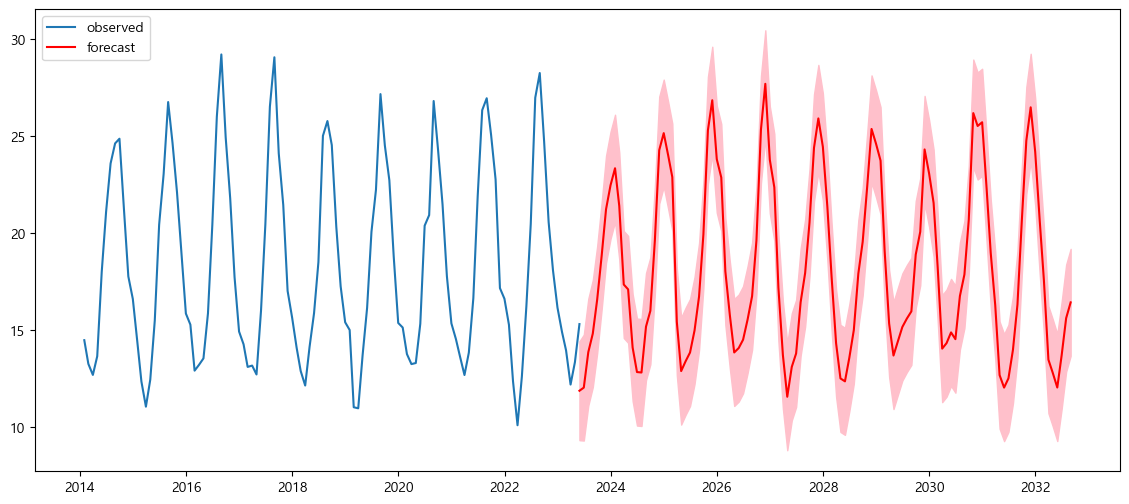

                                      SARIMAX Results                                       
Dep. Variable:                            평균 수온(°C)   No. Observations:                  112
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 18)   Log Likelihood                -188.847
Date:                              Wed, 31 May 2023   AIC                            399.693
Time:                                      15:24:03   BIC                            429.597
Sample:                                           0   HQIC                           411.826
                                              - 112                                         
Covariance Type:                                opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
평균 풍속(m/s)      0.0976      0.324      0.301      0.764      -0.538       0.733
평균기압(hPa)       

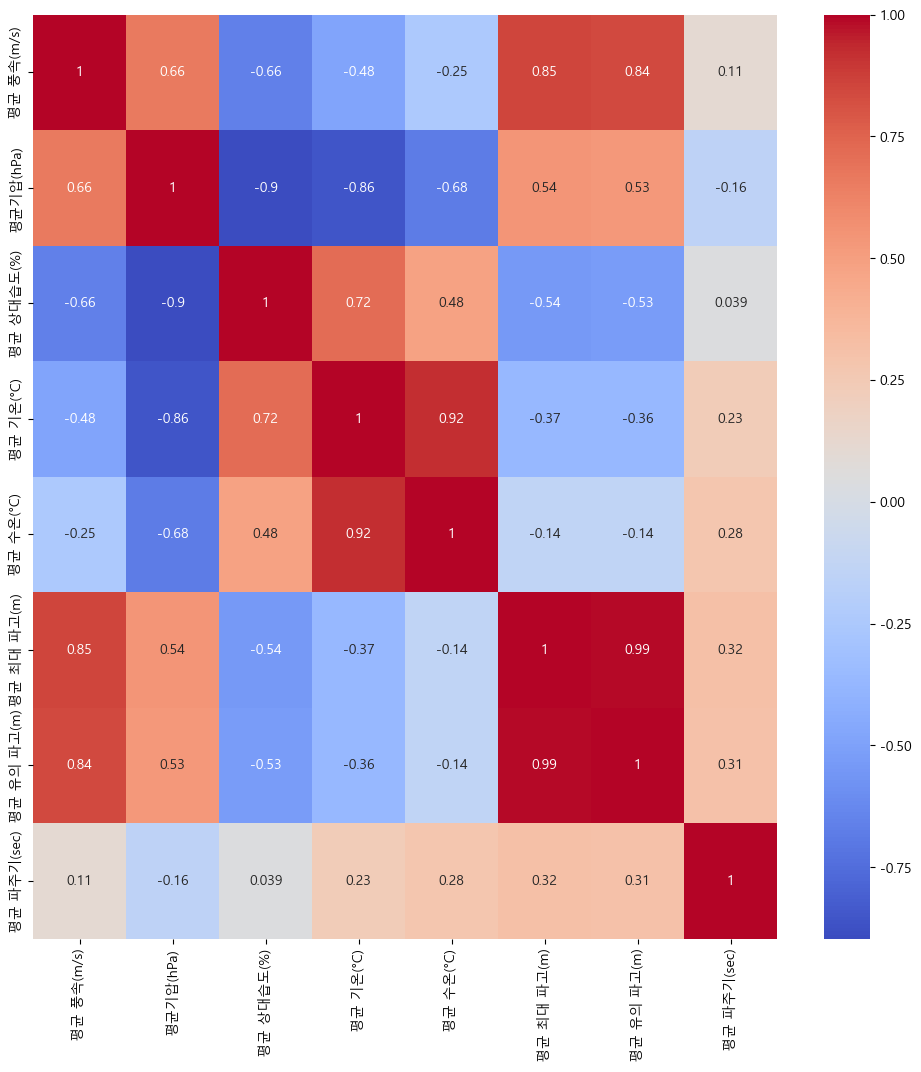

In [4]:
# csv 파일을 읽어옵니다.
from sklearn.preprocessing import StandardScaler,robust_scale
import pandas as pd
# 데이터를 불러옵니다.
data = pd.read_csv('data/20230519추자도해양데이터.csv', parse_dates=True, encoding='utf-8')
date = data['일시']
date=date.dropna()
print(date)
data=data.set_index(pd.to_datetime(data.일시)) # Date를 인덱스로
data.index = pd.to_datetime(data.index)
data = data[['평균 풍속(m/s)','평균기압(hPa)','평균 상대습도(%)','평균 기온(°C)','평균 수온(°C)','평균 최대 파고(m)','평균 유의 파고(m)','평균 파주기(sec)']].resample('M').mean()

print(data)
data = data.sort_values('일시', ascending=True)
data.loc[data['평균 수온(°C)'] == 0, '평균 수온(°C)'] = np.nan
data=data.dropna()

data = data.reset_index()  # 인덱스를 열로 변환
# data = data.drop(['index'],axis=1)

data = data.rename(columns={'일시': 'date'})  # 열 이름 변경
# data['date'] = pd.to_datetime(data['date'], format="%Y.%m")  # 날짜 형식으로 변환
data = data.rename(columns={'date': '일시'})
data = data.set_index('일시')  # 다시 인덱스로 설정

print(data)
# 스케일링
# 스케일링
# 인덱스를 PeriodIndex로 변환합니다.
# data = data.iloc[::-1]
# data.index = pd.date_range(start='2013-01-06', periods=len(data), freq='d')
# exog를 다시 정의합니다.
exog = data[['평균 풍속(m/s)','평균기압(hPa)','평균 상대습도(%)','평균 기온(°C)','평균 최대 파고(m)','평균 유의 파고(m)','평균 파주기(sec)']]
print(exog)
# 시계열 모델을 학습합니다.
model = SARIMAX(data['평균 수온(°C)'], order=(1, 0, 0), seasonal_order=(1, 0, 1, 18), exog=exog)

results = model.fit(disp=False)

# 예측 기간을 설정합니다.
forecast_steps = len(data)

# 예측 결과와 신뢰 구간을 얻습니다.
forecast = results.get_forecast(steps=forecast_steps, exog=exog[-forecast_steps:])
forecast_conf_int = forecast.conf_int()
# 예측 결과의 인덱스를 원본 데이터와 동일한 시간 범위로 설정합니다.
from numpy import timedelta64

# 예측 결과의 인덱스를 원본 데이터와 동일한 시간 범위로 설정합니다.
# forecast_index = pd.period_range(start=data.index[-1] + timedelta64(1, 'M'), periods=forecast_steps, freq='M')

# forecast_index = pd.period_range(data.index[-1] + 1, periods=forecast_steps, freq='M')
forecast_index = pd.period_range(start='2023-05-19', periods=forecast_steps, freq='m')
print(forecast_index)

forecast_index_timestamp = forecast_index.to_timestamp()  # PeriodIndex를 Timestamp로 변환
forecast.predicted_mean.index = forecast_index
forecast_conf_int.index = forecast_index.strftime('%Y-%m-%d')
print(forecast.predicted_mean)

# predicted_mean df 인덱스 추가(아래 mysql 저장 위해)
predicted_mean = pd.DataFrame(forecast.predicted_mean)
predicted_mean.index = forecast_index.strftime('%Y-%m-%d')
print('forecast.predicted_mean',forecast.predicted_mean)

# 결과를 시각화합니다.
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(data.index, data['평균 수온(°C)'], label='observed')
plt.plot(forecast_index, forecast.predicted_mean, label='forecast', color='r')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink')
plt.legend(loc='upper left')
plt.show()

print(results.summary())

# 예측 오차 계산
from sklearn.metrics import mean_squared_error
import numpy as np

y_true = data['평균 수온(°C)'][-forecast_steps:]
y_pred = forecast.predicted_mean
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(y_pred)
y_pred.to_csv('forecast_results(stemp).csv', index=True, index_label='date')

# 예측 오차 출력
print('RMSE:', rmse)
import seaborn as sns

corr = data.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

forecast.predicted_mean.to_csv('data/stemp_data_month_forecast.csv', index=False)
data.to_csv('data/stemp_data_month_data.csv', index=False)

In [5]:
# data
# forecast.predicted_mean
# forecast_conf_int


import pymysql
from sqlalchemy import create_engine, types

# Establish a connection to MySQL
host = 'localhost'
user = 'root'
password = '1234'
database = 'stemp'

# 인덱스 복구
data = data.reset_index()
forecast_conf_int = forecast_conf_int.reset_index()
predicted_mean = predicted_mean.reset_index()

conn = pymysql.connect(host=host, user=user, password=password, database=database)

# Create a SQLAlchemy engine
engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}')

list1 = [data, predicted_mean, forecast_conf_int]  # 첫 번째 요소들의 리스트
list2 = ['stemprealchoomonth', 'stempforechoomonth', 'stempforeconfchoomonth']  # 두 번째 요소들의 리스트

for item1, item2 in zip(list1, list2):
    # 각 요소들을 item1, item2 변수에 할당하여 반복문 실행
    table_name = item2
    dtype = {'일시': types.Date(), '평균 풍속(m/s)': types.Float(), '평균기압(hPa)': types.Float(), '평균 상대습도(%)': types.Float(), '평균 기온(°C)': types.Float(), 
             '평균 수온(°C)': types.Float(), '평균 최대 파고(m)': types.Float(), '평균 유의 파고(m)': types.Float(), '평균 파주기(sec)': types.Float()}
    item1.to_sql(table_name, engine, if_exists='replace', index=False, dtype=dtype)

conn.close()

0       2014-01-15
1       2014-01-16
2       2014-01-17
3       2014-01-18
4       2014-01-19
           ...    
3212    2023-05-14
3213    2023-05-15
3214    2023-05-16
3215    2023-05-17
3216    2023-05-18
Name: 일시, Length: 3217, dtype: object
            평균 풍속(m/s)    평균기압(hPa)  평균 상대습도(%)  평균 기온(°C)  평균 수온(°C)  \
일시                                                                      
2015-12-31    5.985484  1015.489407   78.875000  15.387391  18.050820   
2016-12-31    6.201433  1015.924534   78.208333  15.485672  18.505460   
2017-12-31    6.147486  1015.880609   74.252778  15.983611  18.689751   
2018-12-31    6.222039  1015.873204   77.261972  15.847443  18.174504   
2019-12-31    6.007023  1015.434028   77.767918  16.174403  18.081145   
2020-12-31    6.345066  1016.632013   73.715254  14.354967  17.722442   
2021-12-31    6.823464  1016.018663   79.153203  16.381844  18.938719   
2022-12-31    6.522802  1016.694429   74.975069  14.737119  18.505263   

            평균 최대 파고(m

c:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)


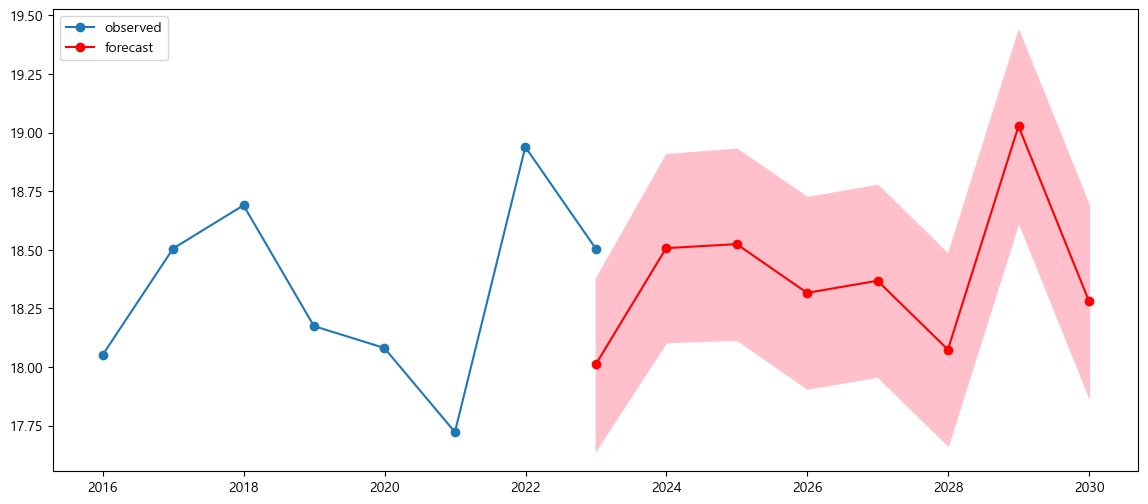

                                      SARIMAX Results                                       
Dep. Variable:                            평균 수온(°C)   No. Observations:                    8
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 18)   Log Likelihood                   2.174
Date:                              Wed, 31 May 2023   AIC                             17.652
Time:                                      15:25:02   BIC                             18.526
Sample:                                  12-31-2015   HQIC                            11.759
                                       - 12-31-2022                                         
Covariance Type:                                opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
평균 풍속(m/s)      0.4502      1.919      0.235      0.815      -3.311       4.212
평균기압(hPa)       

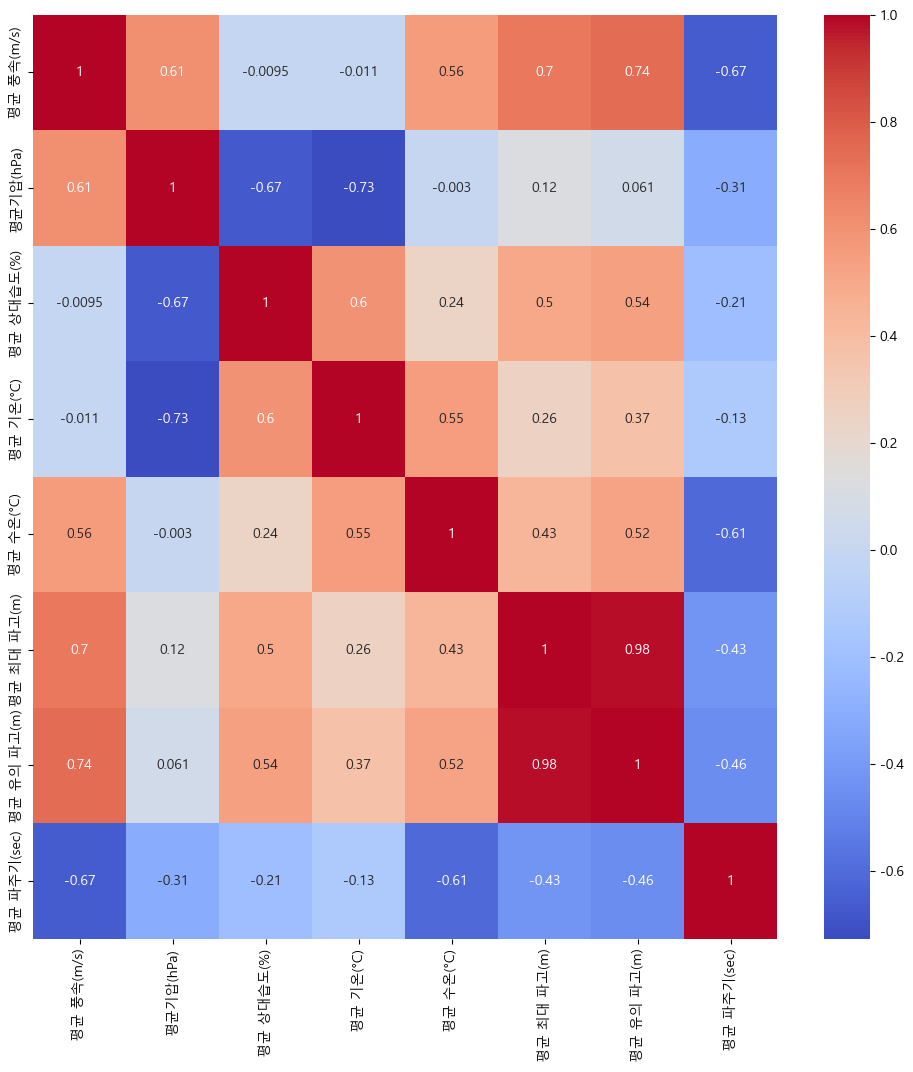

In [6]:
# csv 파일을 읽어옵니다.
from sklearn.preprocessing import StandardScaler,robust_scale
import pandas as pd
# 데이터를 불러옵니다.
data = pd.read_csv('data/20230519추자도해양데이터.csv', parse_dates=True, encoding='utf-8')
date = data['일시']
date=date.dropna()
print(date)
data=data.set_index(pd.to_datetime(data.일시)) # Date를 인덱스로
data.index = pd.to_datetime(data.index)
data = data[['평균 풍속(m/s)','평균기압(hPa)','평균 상대습도(%)','평균 기온(°C)','평균 수온(°C)','평균 최대 파고(m)','평균 유의 파고(m)','평균 파주기(sec)']].resample('Y').mean()
data = data.iloc[1:-1]

print(data)
data = data.sort_values('일시', ascending=True)
data.loc[data['평균 수온(°C)'] == 0, '평균 수온(°C)'] = np.nan
data=data.dropna()

data = data.reset_index()  # 인덱스를 열로 변환
# data = data.drop(['index'],axis=1)

data = data.rename(columns={'일시': 'date'})  # 열 이름 변경
# data['date'] = pd.to_datetime(data['date'], format="%Y.%m")  # 날짜 형식으로 변환
data = data.rename(columns={'date': '일시'})
data = data.set_index('일시')  # 다시 인덱스로 설정

print(data)
# 스케일링
# 스케일링
# 인덱스를 PeriodIndex로 변환합니다.
# data = data.iloc[::-1]
# data.index = pd.date_range(start='2013-01-06', periods=len(data), freq='d')
# exog를 다시 정의합니다.
exog = data[['평균 풍속(m/s)','평균기압(hPa)','평균 상대습도(%)','평균 기온(°C)','평균 최대 파고(m)','평균 유의 파고(m)','평균 파주기(sec)']]
print(exog)
# 시계열 모델을 학습합니다.
model = SARIMAX(data['평균 수온(°C)'], order=(1, 0, 0), seasonal_order=(1, 0, 1, 18), exog=exog)

results = model.fit(disp=False)

# 예측 기간을 설정합니다.
forecast_steps = len(data)

# 예측 결과와 신뢰 구간을 얻습니다.
forecast = results.get_forecast(steps=forecast_steps, exog=exog[-forecast_steps:])
forecast_conf_int = forecast.conf_int()
# 예측 결과의 인덱스를 원본 데이터와 동일한 시간 범위로 설정합니다.
from numpy import timedelta64

# 예측 결과의 인덱스를 원본 데이터와 동일한 시간 범위로 설정합니다.
# forecast_index = pd.period_range(start=data.index[-1] + timedelta64(1, 'M'), periods=forecast_steps, freq='M')

# forecast_index = pd.period_range(data.index[-1] + 1, periods=forecast_steps, freq='M')
forecast_index = pd.period_range(start='2022-05-19', periods=forecast_steps, freq='y')
print(forecast_index)

forecast_index_timestamp = forecast_index.to_timestamp()  # PeriodIndex를 Timestamp로 변환
forecast.predicted_mean.index = forecast_index
forecast_conf_int.index = forecast_index.strftime('%Y-%m-%d')
print(forecast.predicted_mean)

# 결과를 시각화합니다.
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(data.index, data['평균 수온(°C)'], label='observed', marker='o', linestyle='-')
plt.plot(forecast_index, forecast.predicted_mean, label='forecast', color='r', marker='o', linestyle='-')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink')
plt.legend(loc='upper left')
plt.show()

print(results.summary())

# 예측 오차 계산
from sklearn.metrics import mean_squared_error
import numpy as np

y_true = data['평균 수온(°C)'][-forecast_steps:]
y_pred = forecast.predicted_mean
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(y_pred)
y_pred.to_csv('forecast_results(stemp).csv', index=True, index_label='date')

# 예측 오차 출력
print('RMSE:', rmse)
import seaborn as sns

corr = data.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

forecast.predicted_mean.to_csv('data/stemp_data_month_forecast.csv', index=False)
data.to_csv('data/stemp_data_month_data.csv', index=False)

In [7]:
# data
# forecast.predicted_mean
# forecast_conf_int


import pymysql
from sqlalchemy import create_engine, types

# Establish a connection to MySQL
host = 'localhost'
user = 'root'
password = '1234'
database = 'stemp'

# 인덱스 복구
data = data.reset_index()
forecast_conf_int = forecast_conf_int.reset_index()
forecast.predicted_mean = forecast.predicted_mean.reset_index()

conn = pymysql.connect(host=host, user=user, password=password, database=database)

# Create a SQLAlchemy engine
engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}')

list1 = [data, forecast.predicted_mean, forecast_conf_int]  # 첫 번째 요소들의 리스트
list2 = ['stemprealchooyear', 'stempforechooyear', 'stempforeconfchooyear']  # 두 번째 요소들의 리스트

for item1, item2 in zip(list1, list2):
    # 각 요소들을 item1, item2 변수에 할당하여 반복문 실행
    table_name = item2
    dtype = {'일시': types.Date(), '평균 풍속(m/s)': types.Float(), '평균기압(hPa)': types.Float(), '평균 상대습도(%)': types.Float(), '평균 기온(°C)': types.Float(), 
             '평균 수온(°C)': types.Float(), '평균 최대 파고(m)': types.Float(), '평균 유의 파고(m)': types.Float(), '평균 파주기(sec)': types.Float()}
    item1.to_sql(table_name, engine, if_exists='replace', index=False, dtype=dtype)

conn.close()